In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
species = df['Species']
df = df.drop('Species', axis=1)

In [ ]:
PCA_obj = PCA(n_components=2)
PCA_obj.fit(df)
reduced_data = PCA_obj.transform(df)

In [ ]:
reduced_df = pd.DataFrame(data=reduced_data, columns=['Z1', 'Z2'])
reduced_df['species'] = species.reset_index(drop=True)

In [ ]:
reduced_df

,Z1,Z2,species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


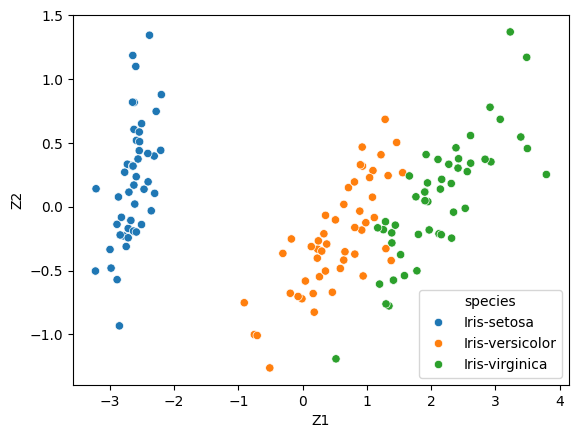

In [ ]:
sns.scatterplot(x="Z1", y="Z2", hue="species", data=reduced_df)
plt.show()

In [ ]:
df['Species'] = species.reset_index(drop=True)
train=df.sample(frac=0.8,random_state=45)
test=df.drop(train.index)
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,4.4,2.9,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa


In [ ]:
x_train = train.drop(columns=['Species'])
y_train = train['Species']
x_test = test.drop(columns=['Species'])
y_test = test['Species']

mean = x_train.mean()
std = x_train.std()
x_train_normalized = (x_train - mean) / std
x_test_normalized = (x_test - mean) / std

x_train_normalized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.884885,1.163088,-1.340176,-1.307708
43,-1.008071,1.163088,-1.226401,-0.780229
129,1.702018,-0.074240,1.162876,0.538468
3,-1.500815,0.173226,-1.283288,-1.307708
34,-1.131257,0.173226,-1.283288,-1.439577
...,...,...,...,...
11,-1.254443,0.915622,-1.226401,-1.307708
42,-1.747187,0.420691,-1.397064,-1.307708
108,1.086089,-1.311567,1.162876,0.802207
6,-1.500815,0.915622,-1.340176,-1.175838


In [ ]:
import math
def euclidean_distance(p1, p2):
    squared_distance = 0
    for i in range(len(p1)):
        squared_distance += (p1[i] - p2[i]) ** 2
    return math.sqrt(squared_distance)

In [ ]:
def knn(X_train, y_train, X_test, y_test, k):
    correctc=0
    predictions = []
    for test_point in X_test:
        distances = []
        for i in range(len(X_train)):
          data=[]
          data.append(euclidean_distance(test_point, X_train[i]))
          data.append(y_train[i])
          distances.append(data)

        distances.sort(key=lambda x: x[0])
        nearest_neighbors = [neighbor[1] for neighbor in distances[:k]]

        counts = {}
        for species in nearest_neighbors:
            if species in counts:
                counts[species] += 1
            else:
                counts[species] = 1
        predictions.append(max(counts, key=counts.get))
    correct_predictions = (predictions == y_test).sum()
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions
    # print("predictions: ",predictions)
    print("K:", k, ", Accuracy:", accuracy)

In [ ]:
for k in [3, 5, 7]:
    knn(x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), k=k)
print("----------------------")
print("After Normalization")
for k in [3, 5, 7]:
    knn(x_train_normalized.to_numpy(), y_train.to_numpy(), x_test_normalized.to_numpy(), y_test.to_numpy(), k)

K: 3 , Accuracy: 0.9666666666666667
K: 5 , Accuracy: 0.9666666666666667
K: 7 , Accuracy: 0.9666666666666667
----------------------
After Normalization
K: 3 , Accuracy: 0.9666666666666667
K: 5 , Accuracy: 0.9666666666666667
K: 7 , Accuracy: 0.9666666666666667
